### Lab3 minimizing cost function

- 학습 날짜 : 2019-06-18 점심 시간

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

%matplotlib inline

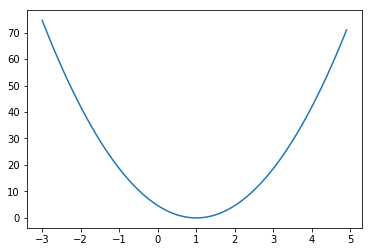

In [2]:
X = [1, 2, 3]
Y = [1, 2, 3]

W = tf.placeholder(tf.float32)

# Our hypothesis for linear model X * W
hypothesis = X * W

# cost / loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Launch the graph in a session
sess = tf.Session()

# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

# Variables for plotting cost function

W_val = []
cost_val = []

for i in range(-30, 50):
    feed_W = i * 0.1
    curr_cost, curr_W = sess.run([cost, W], feed_dict = {W : feed_W})
    W_val.append(curr_W)
    cost_val.append(curr_cost)
    
    
# Show the cost function
plt.plot(W_val, cost_val)
plt.show()

### Gradient descent

- 아래의 코드는 다음으로 대체 가능하다.

```python3
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
train = optimizer.minimize(cost)
```

In [8]:
# learning_rate = 0.1
# gradient = tf.reduce_mean((W * X - Y) * X)
# descent = W - learning_rate * gradient
# update = W.assign(descent)

### full code

In [ ]:
# tf.set_random_seed(777)  # for reproducibility

# x_data = [1, 2, 3]
# y_data = [1, 2, 3]

# # Try to find values for W and b to compute y_data = W * x_data
# # We know that W should be 1
# # But let's use TensorFlow to figure it out
# # W = tf.Variable(tf.random_normal([1]), name="weight")

# X = tf.placeholder(tf.float32)
# Y = tf.placeholder(tf.float32)

# # Our hypothesis for linear model X * W
# hypothesis = X * W

# # cost/loss function
# cost = tf.reduce_mean(tf.square(hypothesis - Y))

# # # Minimize: Gradient Descent using derivative: W -= learning_rate * derivative
# # learning_rate = 0.1
# # gradient = tf.reduce_mean((W * X - Y) * X)
# # descent = W - learning_rate * gradient
# # update = W.assign(descent)

# # Minimize : Gradient Descent Magic
# optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
# train = optimizer.minimize(cost)

# # Launch the graph in a session.
# ssee



In [9]:
# tf Graph Input
X = [1, 2, 3]
Y = [1, 2, 3]

# Set wrong model weights
W = tf.Variable(5.0)

# Linear model
hypothesis = X * W

# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize: Gradient Descent Optimizer
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# Launch the graph in a session.
with tf.Session() as sess:
    # Initializes global variables in the graph.
    sess.run(tf.global_variables_initializer())

    for step in range(101):
        _, W_val = sess.run([train, W])
        print(step, W_val)

0 1.2666664
1 1.0177778
2 1.0011852
3 1.000079
4 1.0000052
5 1.0000004
6 1.0
7 1.0
8 1.0
9 1.0
10 1.0
11 1.0
12 1.0
13 1.0
14 1.0
15 1.0
16 1.0
17 1.0
18 1.0
19 1.0
20 1.0
21 1.0
22 1.0
23 1.0
24 1.0
25 1.0
26 1.0
27 1.0
28 1.0
29 1.0
30 1.0
31 1.0
32 1.0
33 1.0
34 1.0
35 1.0
36 1.0
37 1.0
38 1.0
39 1.0
40 1.0
41 1.0
42 1.0
43 1.0
44 1.0
45 1.0
46 1.0
47 1.0
48 1.0
49 1.0
50 1.0
51 1.0
52 1.0
53 1.0
54 1.0
55 1.0
56 1.0
57 1.0
58 1.0
59 1.0
60 1.0
61 1.0
62 1.0
63 1.0
64 1.0
65 1.0
66 1.0
67 1.0
68 1.0
69 1.0
70 1.0
71 1.0
72 1.0
73 1.0
74 1.0
75 1.0
76 1.0
77 1.0
78 1.0
79 1.0
80 1.0
81 1.0
82 1.0
83 1.0
84 1.0
85 1.0
86 1.0
87 1.0
88 1.0
89 1.0
90 1.0
91 1.0
92 1.0
93 1.0
94 1.0
95 1.0
96 1.0
97 1.0
98 1.0
99 1.0
100 1.0


In [ ]:
# tf Graphe input

X = [1, 2, 3]
Y = [1, 2, 3]

# Set wrong model weights
W = tf.Variable(5.0)

# linear model
hypothesis = W * X

# cost / loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize : Gradient Descent Optimizer
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# Launch the graph in a session.

with tf.Session() as sess:
    # Initiallizes global variables in the graph.
    
    sess.run(tf.global_variables_initializer())
    
    for step in range(101):
        _, W_val = sess.run([train, W])
        print(step, W_val)

### Optional : compute_gradient and apply_gradient

In [2]:
# tf Graph Input
X = [1, 2, 3]
Y = [1, 2, 3]

# Set wrong model weights
W = tf.Variable(5.)

# Linear model
hypothesis = X * W

# Manual gradient
gradient = tf.reduce_mean((W * X - Y) * X) * 2

# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize: Gradient Descent Optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)

# Get gradients 여기서 계산을 해줘!! 라고 한 다음에 수정을 할 수가 있다.
gvs = optimizer.compute_gradients(cost)

# Optional: modify gradient if necessary
# gvs = [(tf.clip_by_value(grad, -1., 1.), var) for grad, var in gvs]

# Apply gradients # 별도의 수정을 하지 않았으니까 거의 비슷하게 나올 것이다.
apply_gradients = optimizer.apply_gradients(gvs)

# Launch the graph in a session.
with tf.Session() as sess:
    # Initializes global variables in the graph.
    sess.run(tf.global_variables_initializer())

    for step in range(101):
        gradient_val, gvs_val, _ = sess.run([gradient, gvs, apply_gradients])
        print(step, gradient_val, gvs_val)

Instructions for updating:
Colocations handled automatically by placer.
0 37.333332 [(37.333336, 4.6266665)]
1 33.84889 [(33.84889, 4.2881775)]
2 30.689657 [(30.689657, 3.9812808)]
3 27.825287 [(27.825287, 3.703028)]
4 25.228262 [(25.228262, 3.4507453)]
5 22.873621 [(22.873623, 3.2220092)]
6 20.738752 [(20.73875, 3.0146217)]
7 18.803137 [(18.803137, 2.8265903)]
8 17.048176 [(17.048176, 2.6561086)]
9 15.457013 [(15.457014, 2.5015385)]
10 14.014359 [(14.01436, 2.361395)]
11 12.706352 [(12.706352, 2.2343314)]
12 11.520427 [(11.520427, 2.119127)]
13 10.445186 [(10.445185, 2.0146751)]
14 9.470302 [(9.470302, 1.9199722)]
15 8.586407 [(8.586407, 1.8341081)]
16 7.785009 [(7.785009, 1.756258)]
17 7.0584083 [(7.0584083, 1.685674)]
18 6.399624 [(6.399624, 1.6216778)]
19 5.8023257 [(5.8023252, 1.5636545)]
20 5.260776 [(5.260776, 1.5110468)]
21 4.7697697 [(4.7697697, 1.4633491)]
22 4.324591 [(4.324591, 1.4201032)]
23 3.9209633 [(3.9209635, 1.3808936)]
24 3.5550067 [(3.5550067, 1.3453435)]
25 3.2232